In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Preprocessing

In [3]:
#this function takes the text from the csv and preprocesses it 
#(changes to lower case, sent tokenzies, word tokenizes,
#removes unnecessary characters, lemmatizes, and puts it in a dataframe)
#help for this function was used from https://git.generalassemb.ly/dsi-911/504-lesson-nlp-i/blob/master/solution-code/solution-code.ipynb

def preprocessing(dataframe, title_text_col):
    lemmatizer = WordNetLemmatizer()
    tokenizer = RegexpTokenizer('\w+')
    text = dataframe[title_text_col]
    
    lemmatized_data = []
    
    df_text = [sent_tokenize(t) for t in text]
    
    for sentences in df_text:
        sentence = []
        for s in sentences:
            words = tokenizer.tokenize(s)
            words_lemmatized = [lemmatizer.lemmatize(word.lower()) for word in words]
            sentences_lemmatized = ' '.join(words_lemmatized)
            sentence.append(sentences_lemmatized)  
        lemmatized_data.append(sentence)
    
    df_lemm = [' '.join(s) for s in lemmatized_data]
    new_df = pd.DataFrame({'title_text': df_lemm, 'subreddit': dataframe['subreddit']})
    return new_df

# Fitness

In [4]:
#reading in the fitness csv and dropping the self_text column because it is empty
fitness = pd.read_csv('./data/fitness.csv')
fitness.drop(['self_text'], axis=1, inplace=True)
fitness.head()

,created_utc,title,subreddit,title_text
0,2023-10-18 09:00:22,Rant Wednesday,Fitness,Rant Wednesday-Welcome to Rant Wednesday: It’s...
1,2023-10-18 09:00:18,"Daily Simple Questions Thread - October 18, 2023",Fitness,"Daily Simple Questions Thread - October 18, 20..."
2,2023-10-17 09:00:48,"Daily Simple Questions Thread - October 17, 2023",Fitness,"Daily Simple Questions Thread - October 17, 20..."
3,2023-10-16 07:02:00,Moronic Monday - Your weekly stupid questions ...,Fitness,Moronic Monday - Your weekly stupid questions ...
4,2023-10-15 09:00:40,"Daily Simple Questions Thread - October 15, 2023",Fitness,"Daily Simple Questions Thread - October 15, 20..."


In [5]:
preprocessing(fitness, 'title_text')

,title_text,subreddit
0,rant wednesday welcome to rant wednesday it s ...,Fitness
1,daily simple question thread october 18 2023 w...,Fitness
2,daily simple question thread october 17 2023 w...,Fitness
3,moronic monday your weekly stupid question thr...,Fitness
4,daily simple question thread october 15 2023 w...,Fitness
...,...,...
962,gym story saturday hi welcome to your weekly t...,Fitness
963,physique phriday welcome to the physique phrid...,Fitness
964,daily simple question thread july 08 2022 welc...,Fitness
965,how to convince myself to not overreach overtr...,Fitness


In [6]:
X = fitness['title_text']
y = fitness['subreddit']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### CountVectorizer

In [8]:
cvec = CountVectorizer(stop_words='english')

In [9]:
cvec.fit(X_train)

CountVectorizer(stop_words='english')

In [10]:
X_train = cvec.transform(X_train)

In [11]:
X_test = cvec.transform(X_test)

In [12]:
X_train_df = pd.DataFrame(X_train.todense(), columns=cvec.get_feature_names_out())

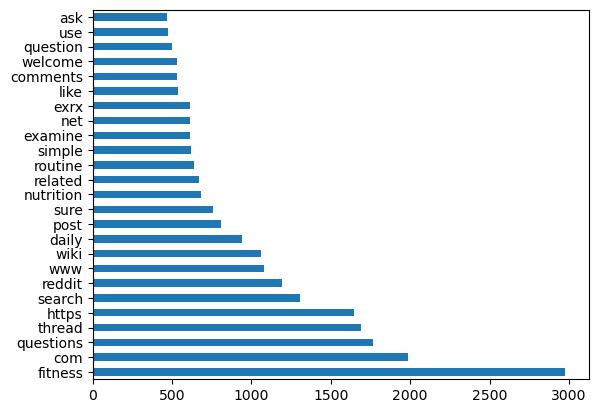

In [13]:
X_train_df.sum().sort_values(ascending=False).head(25).plot(kind='barh');

# Nutrition

In [14]:
#reading in the nutrition csv
nutrition = pd.read_csv('./data/nutrition.csv')
nutrition.head()

,created_utc,title,self_text,subreddit,title_text
0,2023-10-18 22:14:42,Would freezing leafy greens increase the bioav...,I've heard that electrolytes and other nutrien...,nutrition,Would freezing leafy greens increase the bioav...
1,2023-10-18 20:50:49,Unclear Nutrition Facts Label,"I am looking at a nutrition facts label, and i...",nutrition,Unclear Nutrition Facts Label-I am looking at ...
2,2023-10-18 18:50:11,Torn between becoming 100% vegan or follow an ...,"First of all, I want to say that I'm NOT anti-...",nutrition,Torn between becoming 100% vegan or follow an ...
3,2023-10-18 17:22:58,Highest protein meats.,"Hello, seeing many different answers on this, ...",nutrition,"Highest protein meats.-Hello, seeing many diff..."
4,2023-10-18 17:06:37,"Which is worse, candy or chips?",So I was talking with my girlfriend about this...,nutrition,"Which is worse, candy or chips?-So I was talki..."


In [15]:
preprocessing(nutrition, 'title_text')

,title_text,subreddit
0,would freezing leafy green increase the bioava...,nutrition
1,unclear nutrition fact label i am looking at a...,nutrition
2,torn between becoming 100 vegan or follow an o...,nutrition
3,highest protein meat hello seeing many differe...,nutrition
4,which is worse candy or chip so i wa talking w...,nutrition
...,...,...
948,is fruit juice worse than soda i wa at the gro...,nutrition
949,what dietary change made your cognition better...,nutrition
950,random question this ha probably been asked a ...,nutrition
951,oxidization of avocado and loss of nutrient be...,nutrition


In [16]:
X = nutrition['title_text']
y = nutrition['subreddit']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### CountVectorizer

In [18]:
cvec2 = CountVectorizer(stop_words='english')

In [19]:
cvec2.fit(X_train)

CountVectorizer(stop_words='english')

In [20]:
X_train2 = cvec.transform(X_train)

In [21]:
X_test2 = cvec.transform(X_test)

In [22]:
X_train_df2 = pd.DataFrame(X_train2.todense(), columns=cvec.get_feature_names_out())

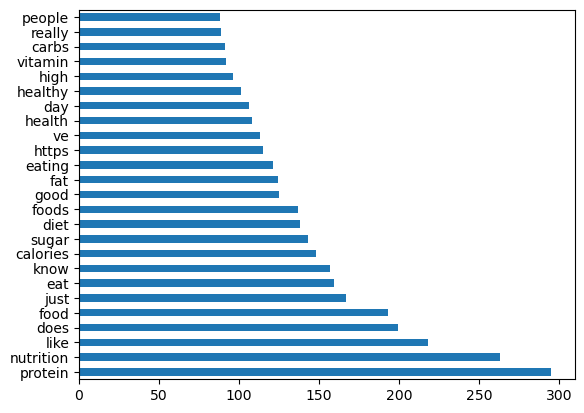

In [23]:
X_train_df2.sum().sort_values(ascending=False).head(25).plot(kind='barh');

# Fitness and Nutrition Combined

In [24]:
# combining the two dfs
combined_df = pd.concat([fitness, nutrition], axis=0)
combined_df.head()

,created_utc,title,subreddit,title_text,self_text
0,2023-10-18 09:00:22,Rant Wednesday,Fitness,Rant Wednesday-Welcome to Rant Wednesday: It’s...,NaN
1,2023-10-18 09:00:18,"Daily Simple Questions Thread - October 18, 2023",Fitness,"Daily Simple Questions Thread - October 18, 20...",NaN
2,2023-10-17 09:00:48,"Daily Simple Questions Thread - October 17, 2023",Fitness,"Daily Simple Questions Thread - October 17, 20...",NaN
3,2023-10-16 07:02:00,Moronic Monday - Your weekly stupid questions ...,Fitness,Moronic Monday - Your weekly stupid questions ...,NaN
4,2023-10-15 09:00:40,"Daily Simple Questions Thread - October 15, 2023",Fitness,"Daily Simple Questions Thread - October 15, 20...",NaN


### CountVectorizer

In [25]:
X = combined_df['title_text']
y = combined_df['subreddit']

In [26]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, random_state=42)

In [27]:
cvec3 = CountVectorizer(stop_words='english')

In [28]:
cvec3.fit(X_train3)

CountVectorizer(stop_words='english')

In [29]:
X_train3_transformed = cvec3.transform(X_train3)

In [30]:
X_test3_transformed = cvec3.transform(X_test3)

In [31]:
X_train_df3 = pd.DataFrame(X_train3_transformed.todense(), columns=cvec3.get_feature_names_out())

### Random Forest Classifier

In [32]:
rf = RandomForestClassifier(oob_score=True, max_features='sqrt')
rf.fit(X_train3_transformed, y_train3)

RandomForestClassifier(oob_score=True)

In [33]:
rf.score(X_train3_transformed, y_train3)

1.0

In [34]:
rf.score(X_test3_transformed, y_test3)

0.9395833333333333

In [35]:
rf.oob_score_

0.9465277777777777

In [36]:
pd.DataFrame({
    'features': cvec3.get_feature_names_out(),
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False).head(15)

,features,importance
8467,welcome,0.040483
7895,thread,0.023233
3508,fitness,0.022131
6541,reddit,0.017270
3924,gym,0.017251
2032,chit,0.013051
6906,saturday,0.012621
6087,post,0.011969
3271,exercises,0.011827
6974,search,0.011568


### Metrics

In [37]:
#predictions
y_pred = rf.predict(X_test3_transformed)

In [38]:
#precision
precision_fitness = precision_score(y_test3, y_pred, pos_label='Fitness')
precision_nutrition = precision_score(y_test3, y_pred, pos_label='nutrition')
precision_fitness, precision_nutrition

(1.0, 0.8905660377358491)

In [39]:
#recall
recall_fitness = recall_score(y_test3, y_pred, pos_label='Fitness')
recall_nutrition = recall_score(y_test3, y_pred, pos_label='nutrition')
recall_fitness, recall_nutrition

(0.8811475409836066, 1.0)

In [40]:
#f1 score
f1_fitness = f1_score(y_test3, y_pred, pos_label='Fitness')
f1_nutrition = f1_score(y_test3, y_pred, pos_label='nutrition')
f1_fitness, f1_nutrition

(0.9368191721132897, 0.9421157684630739)

In [41]:
#confusion matrix
confusion = confusion_matrix(y_test3, y_pred)
confusion

array([[215,  29],
       [  0, 236]], dtype=int64)

### Logistic Regression

In [42]:
lr = LogisticRegression(penalty = 'l1', solver='liblinear')

lr.fit(X_train3_transformed, y_train3)

LogisticRegression(penalty='l1', solver='liblinear')

In [43]:
preds = lr.predict(X_test3_transformed)

In [44]:
lr.score(X_train3_transformed, y_train3)

0.9930555555555556

In [45]:
lr.score(X_test3_transformed, y_test3)

0.9666666666666667

### Metrics

In [46]:
#precision
precision_fitness_lr = precision_score(y_test3, preds, pos_label='Fitness')
precision_nutrition_lr = precision_score(y_test3, preds, pos_label='nutrition')
precision_fitness_lr, precision_nutrition_lr

(0.9789915966386554, 0.9545454545454546)

In [47]:
#recall
recall_fitness_lr = recall_score(y_test3, preds, pos_label='Fitness')
recall_nutrition_lr = recall_score(y_test3, preds, pos_label='nutrition')
recall_fitness_lr, recall_nutrition_lr

(0.9549180327868853, 0.9788135593220338)

In [48]:
#f1 score
f1_fitness_lr = f1_score(y_test3, preds, pos_label='Fitness')
f1_nutrition_lr = f1_score(y_test3, preds, pos_label='nutrition')
f1_fitness_lr, f1_nutrition_lr

(0.9668049792531119, 0.9665271966527197)

In [49]:
#confusion matrix
confusion_lr = confusion_matrix(y_test3, preds)
confusion_lr

array([[233,  11],
       [  5, 231]], dtype=int64)